# Histograms - SPT Sample

### Focus: M500, Redshift, and Richness

Allen Pinjic - Created on May 19th, 2022

In [1]:
from astropy.io.fits import getdata
from astropy.table import Table
import numpy as np

In [2]:
fname = '../data_set/sptecs_catalog_oct919.fits'

data = Table(getdata(fname))

In [3]:
import pandas as pd

In [6]:
df = data.to_pandas()

h = 0.7
df['log_M500'] = np.log10(df.M500*1e14*h)

df0 = df

In [7]:
redshift = df0.REDSHIFT.to_numpy()
lbd = df0.LAMBDA_CHISQ.to_numpy()
zcut = (redshift > 0.1) & (redshift < 0.65)
lcut = lbd > 20
final_cut = zcut & lcut

In [8]:
df = df0.loc[final_cut].copy()

In [9]:
df

,SPT_ID,RA,DEC,FIELD,XI,THETA_CORE,REDSHIFT,REDSHIFT_UNC,SPECZ,REDSHIFT_SOURCE,...,M500_LERR,LAMBDA_CHISQ,LAMBDA_CHISQ_E,RADIO_CONTAM,STRONG_LENS,IMAGE_SOURCE,SPECZ_REF,STRONG_LENS_REF,PHOTOMETRIC_ZREF,log_M500
1,SPT-CLJ0005-3751,1.438318,-37.854369,ra1hdec-35,6.336327,0.75,0.482958,0.007242,0,4.0,...,0.887,86.408386,4.735215,0.0,1.0,3.0,,,,14.579018
2,SPT-CLJ0005-3443,1.487651,-34.719271,ra1hdec-35,5.514429,2.00,0.114000,0.000000,1,9.0,...,1.005,105.385574,4.646943,0.0,0.0,8.0,1989ApJS...70....1A,,,14.571418
7,SPT-CLJ0020-2543,5.173062,-25.727583,ra1hdec-25,7.141808,1.50,0.141000,0.000000,1,9.0,...,1.077,101.159950,18.001257,0.0,0.0,8.0,1999ApJS..125...35S,,,14.692856
10,SPT-CLJ0042-2831,10.526915,-28.522130,ra1hdec-25,8.122652,1.75,0.108600,0.000000,1,9.0,...,1.103,70.527962,2.828000,0.0,0.0,8.0,2002MNRAS.329...87D,,,14.734903
11,SPT-CLJ0042-3809,10.613344,-38.151329,ra1hdec-35,6.616126,1.25,0.219660,0.000000,1,9.0,...,0.984,74.723076,2.981047,0.0,0.0,8.0,1996ApJ...470..172S,,,14.623611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,SPT-CLJ0552-4008,88.123056,-40.136343,ra5hdec-35,4.359108,2.00,0.362500,0.009275,0,4.0,...,0.897,65.890450,4.650317,0.0,0.0,3.0,,,,14.441915
429,SPT-CLJ0554-3149,88.528647,-31.830573,ra5hdec-35,4.620441,0.25,0.218471,0.005045,0,4.0,...,0.944,21.193373,2.535579,0.0,0.0,3.0,,,,14.477150
430,SPT-CLJ0556-2502,89.156331,-25.042366,ra5hdec-25,4.130208,0.25,0.624432,0.013504,0,4.0,...,0.815,20.384859,2.782436,0.0,0.0,3.0,,,,14.405722
431,SPT-CLJ0557-2626,89.371706,-26.437366,ra5hdec-25,4.008900,0.75,0.598462,0.008865,0,4.0,...,0.798,45.250465,3.503051,0.0,0.0,3.0,,,,14.403927


In [10]:
data.colnames

['SPT_ID',
 'RA',
 'DEC',
 'FIELD',
 'XI',
 'THETA_CORE',
 'REDSHIFT',
 'REDSHIFT_UNC',
 'SPECZ',
 'REDSHIFT_SOURCE',
 'RM_PROB',
 'CL_NOTES',
 'M500',
 'M500_UERR',
 'M500_LERR',
 'LAMBDA_CHISQ',
 'LAMBDA_CHISQ_E',
 'RADIO_CONTAM',
 'STRONG_LENS',
 'IMAGE_SOURCE',
 'SPECZ_REF',
 'STRONG_LENS_REF',
 'PHOTOMETRIC_ZREF']

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

array([[<AxesSubplot:title={'center':'M500'}>]], dtype=object)

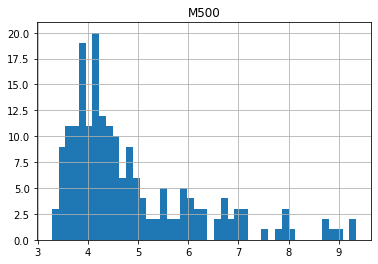

In [12]:
# Example of Original Method
# or df['M500'].plot(kind='hist',bins=50)

df.hist(column="M500", bins=45)

In [13]:
# Setting the background
sns.set_theme(style="darkgrid")

Text(12.334999999999994, 0.5, 'Frequency')

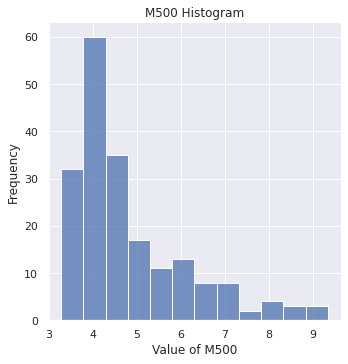

In [14]:
# Seaborn Histogram of M500
sns.displot(df['M500'],  kde=False, label='M500')
plt.title('M500 Histogram')
plt.xlabel('Value of M500')
plt.ylabel('Frequency')

Text(12.334999999999994, 0.5, 'Frequency')

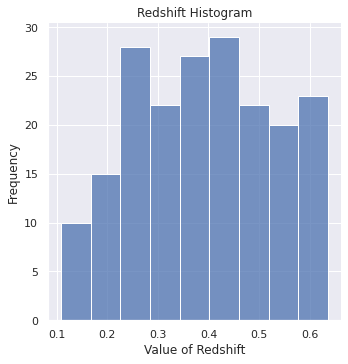

In [15]:
# Seaborn Histogram of Redshift
# 0.65 is the upper threshold for the acceptable range of redshift
# 0.1 is the lower threshold for the acceptable range of redshift (for this project)
# ALREADY EDITED
sns.displot(df['REDSHIFT'],  kde=False, label='M500')
plt.title('Redshift Histogram')
plt.xlabel('Value of Redshift')
plt.ylabel('Frequency')

Text(12.334999999999994, 0.5, 'Frequency')

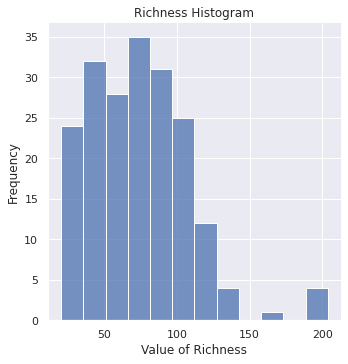

In [16]:
# Seaborn Histogram of Richness
# 0.65 is the upper threshold for the acceptable range of richness
sns.displot(df['LAMBDA_CHISQ'],  kde=False, label='Richness')
plt.title('Richness Histogram')
plt.xlabel('Value of Richness')
plt.ylabel('Frequency')

<AxesSubplot:ylabel='Frequency'>

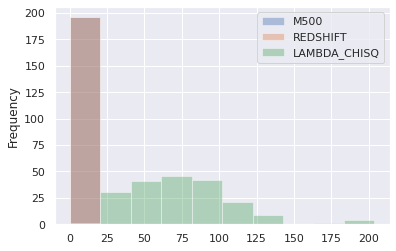

In [18]:
df[["M500", "REDSHIFT","LAMBDA_CHISQ"]].plot.hist(alpha=0.4)

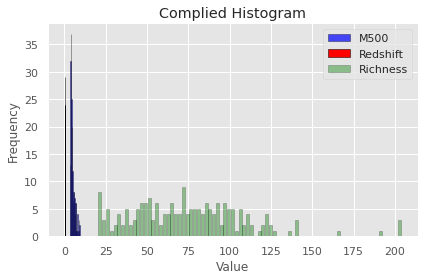

In [19]:
# General model and syntax
# Paper, talk, or poster (Seaborn) (Font scale parameter)
# Seaborn: use for font and style
# Plot with matplotlib

plt.style.use('ggplot')

plt.title('Complied Histogram')

plt.hist(df['M500'], edgecolor='black', color='blue', rwidth=1, alpha=0.7, bins=20, label='M500')
plt.hist(df['REDSHIFT'], edgecolor='black', color='red', rwidth=1, alpha=1, bins=10, label='Redshift')
plt.hist(df['LAMBDA_CHISQ'], edgecolor='black', color='green', rwidth=0.8, alpha=0.4, bins=80, label='Richness')

plt.legend(loc='upper right')

plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

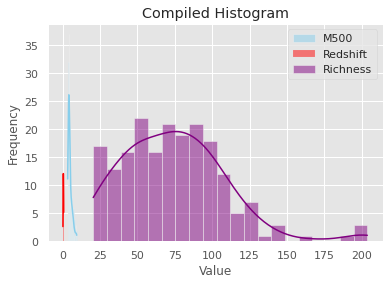

In [20]:
sns.histplot(data=df, x="M500", color="skyblue", label="M500", kde=True, bins=20)
sns.histplot(data=df, x="REDSHIFT", color="red", label="Redshift", kde=True, bins=20)
sns.histplot(data=df, x="LAMBDA_CHISQ", color="purple", label="Richness", kde=True, bins=20)
plt.title('Compiled Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

Text(0.5, 0.98, 'SZ-SPT Bocquet et al. 2019')

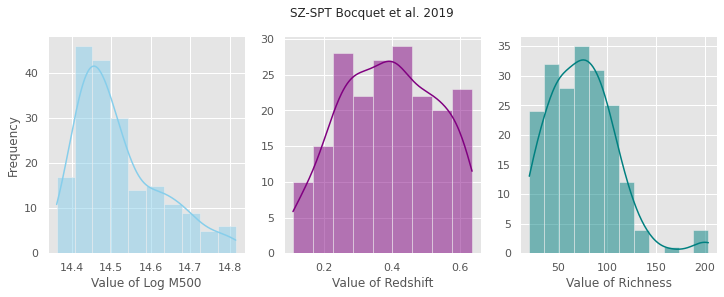

In [21]:
# Multi-axis plots use matplotlib
# Create matplotlib version
# Create a new variable; log of mass
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(data=df, x="log_M500", kde=True, color="skyblue", ax=axs[0])
axs[0].set_xlabel('Value of Log M500')
axs[0].set_ylabel('Frequency')

sns.histplot(data=df, x="REDSHIFT", kde=True, color="purple", ax=axs[1])
axs[1].set_xlabel('Value of Redshift')
axs[1].set_ylabel('')

sns.histplot(data=df, x="LAMBDA_CHISQ", kde=True, color="teal", ax=axs[2])
axs[2].set_xlabel('Value of Richness')
axs[2].set_ylabel('')

fig.suptitle('SZ-SPT Bocquet et al. 2019')

# Completness limit found at the point when the # of clusters
# begins to fall exponentially with the linear mass observable relation
# CL for Lambda = 60